In [10]:
import seaborn as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt
import pandas as pd


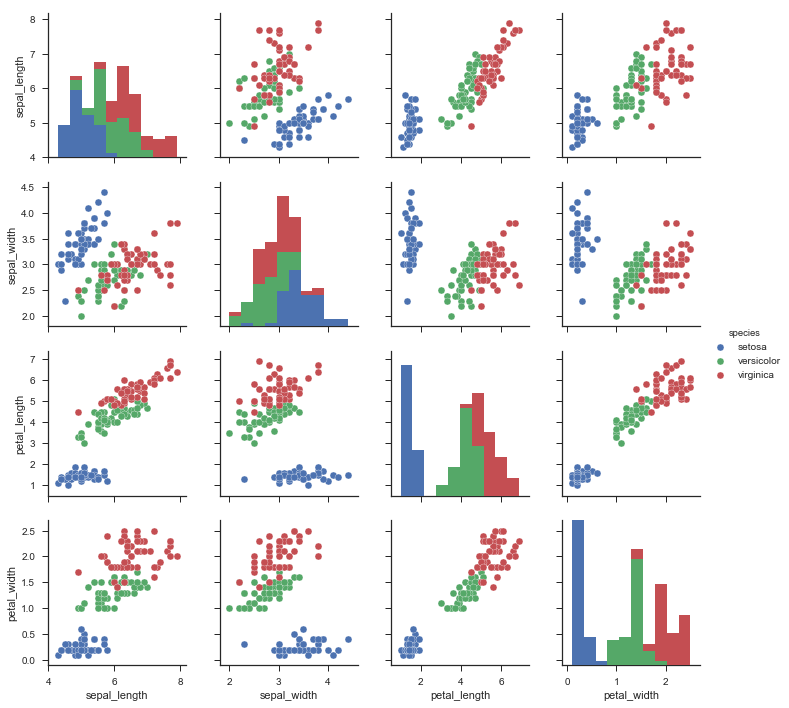

In [6]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

In [7]:
%matplotlib inline

In [8]:
plt.show()

In [19]:
df_pok = pd.read_csv("resources/pokemon1.csv",sep="|",index_col=0)

In [20]:
df_pok.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


#### lmplot is the scatter plot which can be drawn in two ways
#### The first way (recommended) is to pass your DataFrame to the data= argument, while passing #### column names to the axes arguments, x= and y=.
#### The second way is to directly pass in Series of data to the axes arguments.

(0, 142.25647612435475)

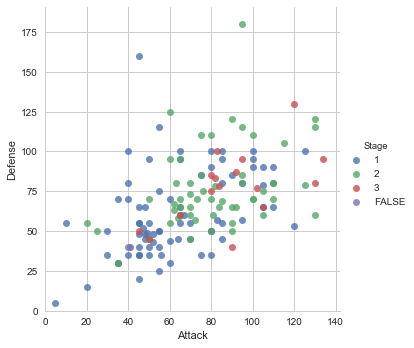

In [75]:
#### hue - allows you to color out points by evolution stage..
#sns.lmplot(x='Attack', y='Defense', data=df_pok,hue='Stage')
### If you want to remove the regression line
sns.lmplot(x='Attack', y='Defense', data=df_pok,hue='Stage', fit_reg=False)

# Tweak using Matplotlib to set the xlim and ylim
plt.ylim(0, None)
plt.xlim(0, None)

In [27]:
# Alternative way - directly pass x and y axis..this does not work ?
sns.lmplot(x=df_pok.Attack, y=df_pok.Defense)

TypeError: lmplot() missing 1 required positional argument: 'data'

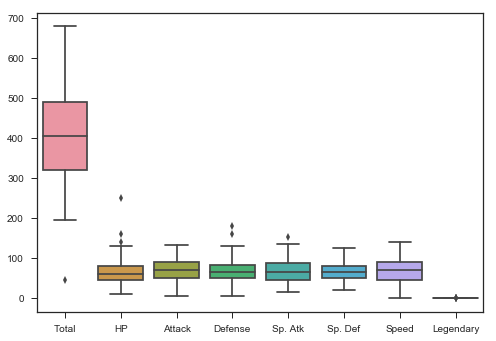

In [39]:
#doing a boxplot on pokemon data
sns.boxplot(data=df_pok)

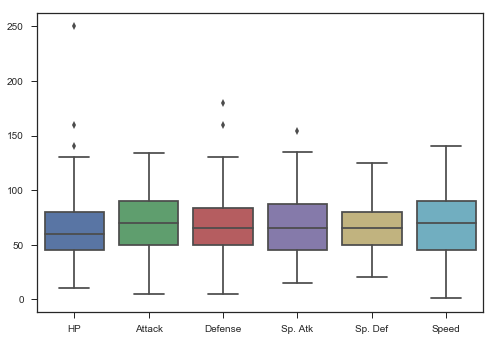

In [40]:
#If you want to remove the Legendary plot it is easier to 
# remove it from the dataframe
# Pre-format DataFrame
stats_df = df_pok.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

#### Violin plots are useful alternatives to box plots.
#### They show the distribution (through the thickness of the violin) instead of only the summary statistics.

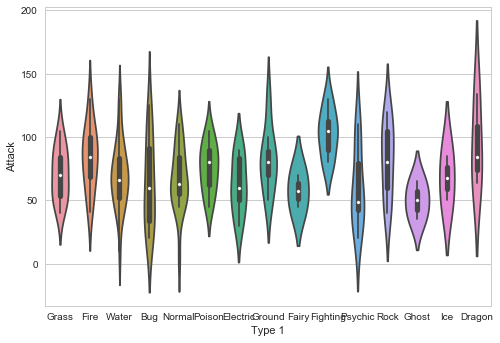

In [42]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot helps to show variance in data.
sns.violinplot(x='Type 1', y='Attack', data=df_pok)

In [43]:
#sns allaws you to associate each dataframe column with a defined color palate..
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

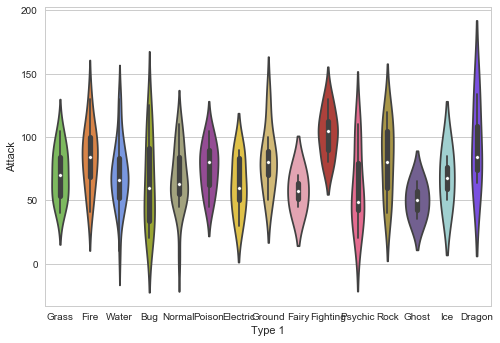

In [46]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df_pok, 
               palette=pkmn_type_colors) # Set color palette

In [ ]:
#now lets move into swarm plot..
# This visualization will show each point, while "stacking" those with similar values:

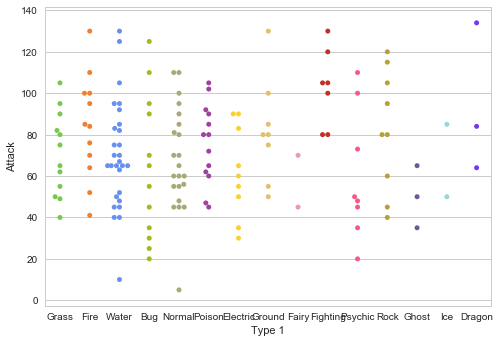

In [48]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df_pok, 
              palette=pkmn_type_colors)

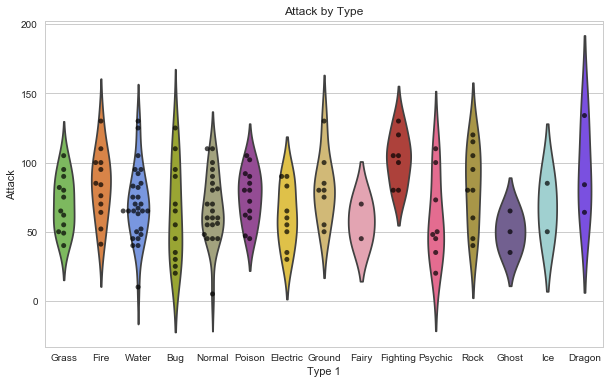

In [49]:
# Set figure size with matplotlib
# This is when you want to overlay the swarm and the violin plots..
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df_pok, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df_pok, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')



In [50]:
#Now try the melting pot..
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [52]:
df_pok.loc

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


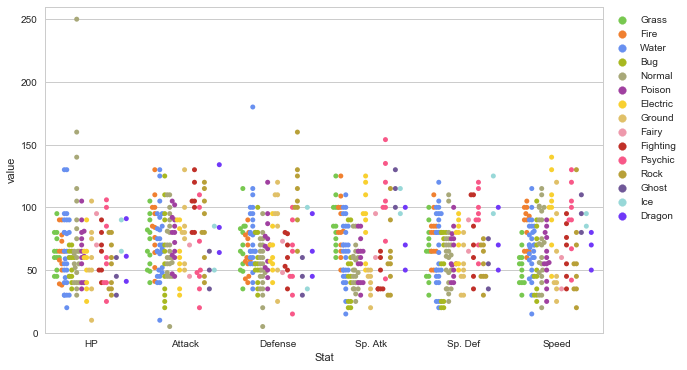

In [73]:

# Swarmplot with melted_df
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors)

# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [76]:
#when to use countplot
# A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

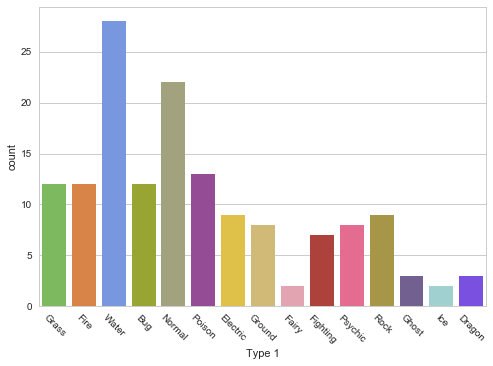

In [77]:
# Count Plot (a.k.a. Bar Plot)
#Bar Plot the standard...
sns.countplot(x='Type 1', data=df_pok, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)
#sns.despine(left=True, bottom=True)

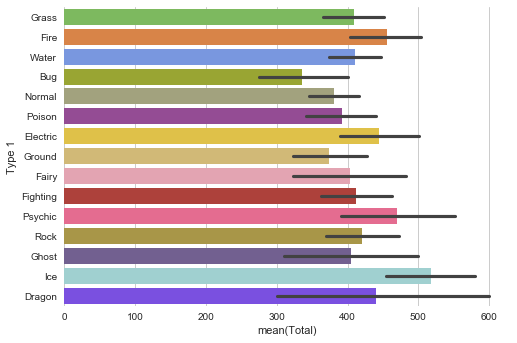

In [88]:
# Count Plot (a.k.a. Bar Plot) Horizontal
#Bar Plot the standard...
#sns.barplot(x='Type 1', data=df_pok, palette=pkmn_type_colors)
sns.barplot(x="Total", y="Type 1", data=df_pok,
            label="Total", palette=pkmn_type_colors) 
# Rotate x-labels
#plt.xticks(rotation=-45)
sns.despine(left=True, bottom=True)

In [79]:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

In [80]:
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY


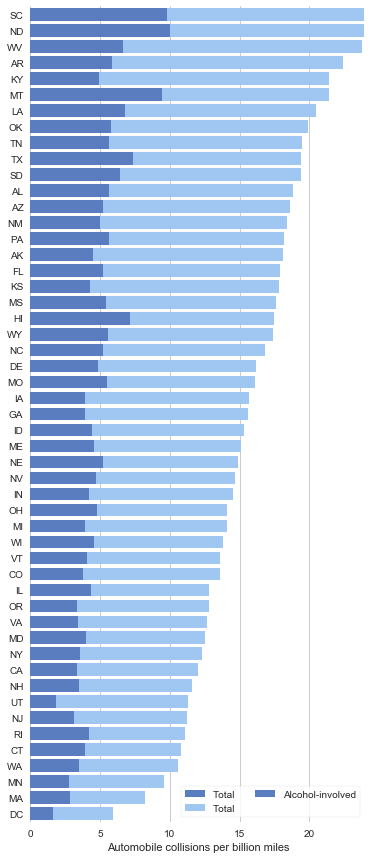

In [81]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

#### Plotting with categorical data
We previously learned how to use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won’t work. There are several options, however, for visualizing such a relationship, which we will discuss in this tutorial.
It’s useful to divide seaborn’s categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each distribution of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The first includes the functions swarmplot() and stripplot(), the second includes boxplot() and violinplot(), and the third includes barplot() and pointplot(). These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.
Much like the relationship between regplot() and lmplot(), in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level factorplot(), which combines these functions with a FacetGrid to apply a categorical plot across a grid of figure panels.
It is easiest and best to invoke these functions with a DataFrame that is in “tidy” format, although the lower-level functions also accept wide-form DataFrames or simple vectors of observations. See below for examples.

https://seaborn.pydata.org/tutorial/categorical.html

In [83]:
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.
Joint Distribution Plot
Python

SyntaxError: invalid syntax (<ipython-input-83-aaf01e5d4e85>, line 1)

##### Joint Distribution Plot


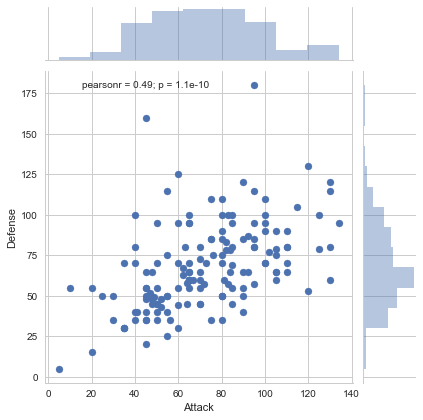

In [84]:
sns.jointplot(x='Attack', y='Defense', data=df_pok)